# Handwritten Digit Recognition using Scikit-Learn
This notebook demonstrates how to build a Machine Learning model to recognize handwritten digits (0-9) using the built-in `load_digits` dataset.

### Step 1: Import Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Libraries imported successfully!")

Libraries imported successfully!


### Step 2: Load the Dataset

In [4]:
# Load the digits dataset
digits = load_digits()

digits
print("Dataset loaded successfully.")

Dataset loaded successfully.


### Step 3: Show Dataset Shape and Class Labels

In [5]:
print(f"Data Shape: {digits.data.shape}") # 1797 samples, 64 features (8x8 images)
print(f"Target labels (Classes): {np.unique(digits.target)}")

Data Shape: (1797, 64)
Target labels (Classes): [0 1 2 3 4 5 6 7 8 9]


### Step 4: Visualize Sample Digit Images

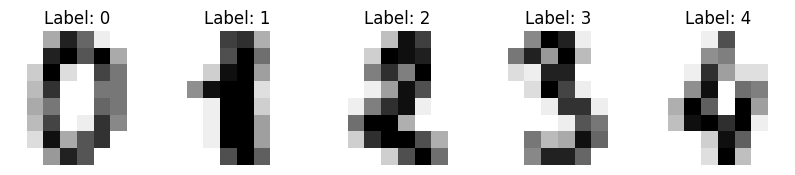

In [6]:
plt.figure(figsize=(10, 4))
for index, (image, label) in enumerate(zip(digits.images[:5], digits.target[:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title(f'Label: {label}')
    plt.axis('off')
plt.show()

### Step 5: Split Data into Train/Test Sets

In [7]:
# X is the data (64 features), y is the target (digit label)
X = digits.data
y = digits.target

# Split: 80% Training, 20% Testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 1437
Testing set size: 360


### Step 6: Train a Model (Logistic Regression)

In [8]:
# Initialize and train Logistic Regression
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)

# Predict and print accuracy
y_pred_lr = lr_model.predict(X_test)
print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}")

Logistic Regression Accuracy: 0.9750


### Step 7: Optional KNN Version

In [13]:
# Initialize and train KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Predict and print accuracy
y_pred_knn = knn_model.predict(X_test)
print(f"KNN Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")

KNN Accuracy: 0.9861


### Step 8: Classification Report and Confusion Matrix (using Logistic Regression result)

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       0.97      0.97      0.97        34
           4       1.00      0.98      0.99        46
           5       0.92      0.96      0.94        47
           6       0.97      0.97      0.97        35
           7       1.00      0.97      0.99        34
           8       0.97      0.97      0.97        30
           9       0.97      0.95      0.96        40

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.98       360



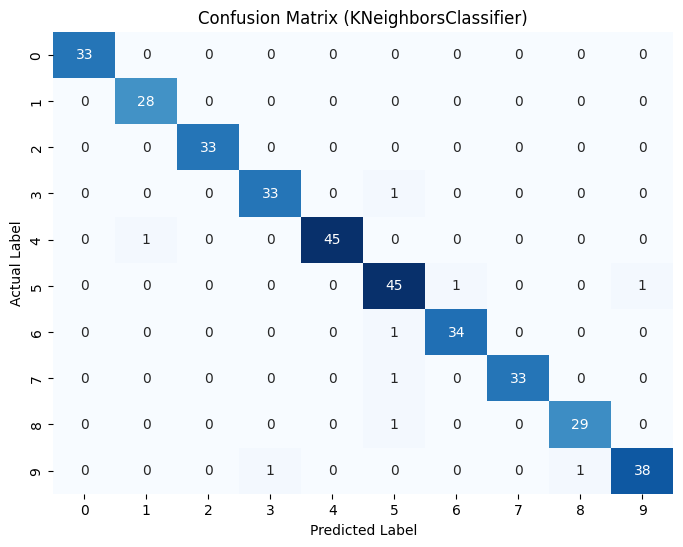

In [14]:
print("Classification Report:")
print(classification_report(y_test, y_pred_lr))

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix (KNeighborsClassifier)')
plt.show()

### Step 9: Predict a Single Digit

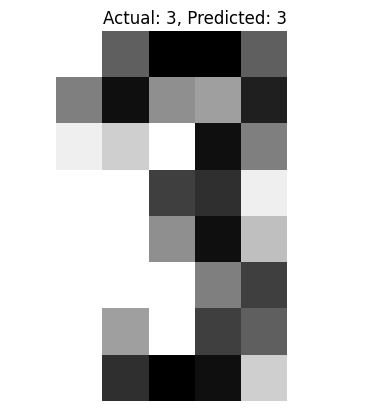

In [17]:
# Pick a random index from the test set
index = 272
sample_image = X_test[index].reshape(8, 8)
actual_label = y_test[index]
predicted_label = lr_model.predict(X_test[index].reshape(1, -1))[0]

plt.imshow(sample_image, cmap=plt.cm.gray_r)
plt.title(f'Actual: {actual_label}, Predicted: {predicted_label}')
plt.axis('off')
plt.show()